In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import SVD
from surprise.model_selection import cross_validate


In [32]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
df= pd.read_csv('ratings_small.csv')
#A:
print(df.head())
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId','rating']], reader)
#C and D:
algo = SVD(biased = False)
cross1 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)



   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0124  1.0168  1.0071  1.0058  0.9964  1.0077  0.0069  
MAE (testset)     0.7806  0.7871  0.7761  0.7771  0.7722  0.7786  0.0050  
Fit time          4.52    4.44    4.50    4.46    4.43    4.47    0.03    
Test time         0.12    0.10    0.16    0.17    0.11    0.13    0.03    


In [48]:
#C and D and E:
from surprise import KNNBasic
#Without name, default is MSE
sim_options = {
    "user_based": True,  # Compute  similarities between items
}
algo = KNNBasic(sim_options = sim_options)
cross2 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
sim_options = {
    "user_based": False,  # Compute  similarities between items
}
algo = KNNBasic(sim_options = sim_options)
cross3 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9743  0.9710  0.9621  0.9777  0.9553  0.9681  0.0082  
MAE (testset)     0.7483  0.7438  0.7419  0.7522  0.7352  0.7443  0.0058  
Fit time          0.19    0.21    0.21    0.21    0.21    0.21    0.01    
Test time         1.24    1.36    1.27    1.29    1.23    1.28    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

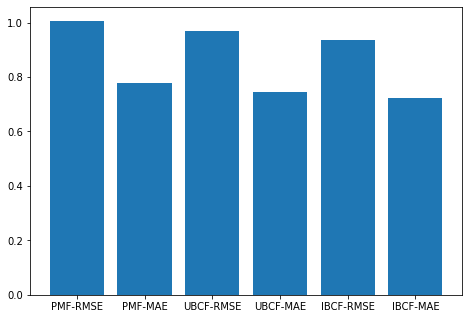

In [37]:
#D:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = [cross1['test_rmse'].mean(), cross1['test_mae'].mean(),cross2['test_rmse'].mean(), cross2['test_mae'].mean(),cross3['test_rmse'].mean(), cross3['test_mae'].mean()]
X = ['PMF-RMSE','PMF-MAE', 'UBCF-RMSE', 'UBCF-MAE', 'IBCF-RMSE', 'IBCF-MAE']
ax.bar(X,y)
plt.show()

In [49]:
#E:
from surprise import KNNBasic
sim_options = {
    "name": "pearson",
    "user_based": True,  # Compute  similarities between items
}
algo = KNNBasic(sim_options = sim_options)
cross4 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
sim_options = {
    "name": "pearson",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNBasic(sim_options = sim_options)
cross5 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9961  0.9950  0.9971  1.0085  0.9911  0.9976  0.0058  
MAE (testset)     0.7703  0.7709  0.7723  0.7784  0.7694  0.7723  0.0032  
Fit time          0.70    0.76    0.71    0.82    0.71    0.74    0.05    
Test time         1.26    1.23    1.22    1.17    1.24    1.23    0.03    
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson simil

In [50]:
#E:
from surprise import KNNBasic
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between items
}
algo = KNNBasic(sim_options = sim_options)
cross6 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNBasic(sim_options = sim_options)
cross7 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9997  0.9920  0.9891  0.9917  0.9969  0.9939  0.0038  
MAE (testset)     0.7702  0.7675  0.7633  0.7662  0.7715  0.7677  0.0029  
Fit time          0.63    0.71    0.62    0.75    0.66    0.67    0.05    
Test time         1.44    1.59    1.39    1.42    1.27    1.42    0.10    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

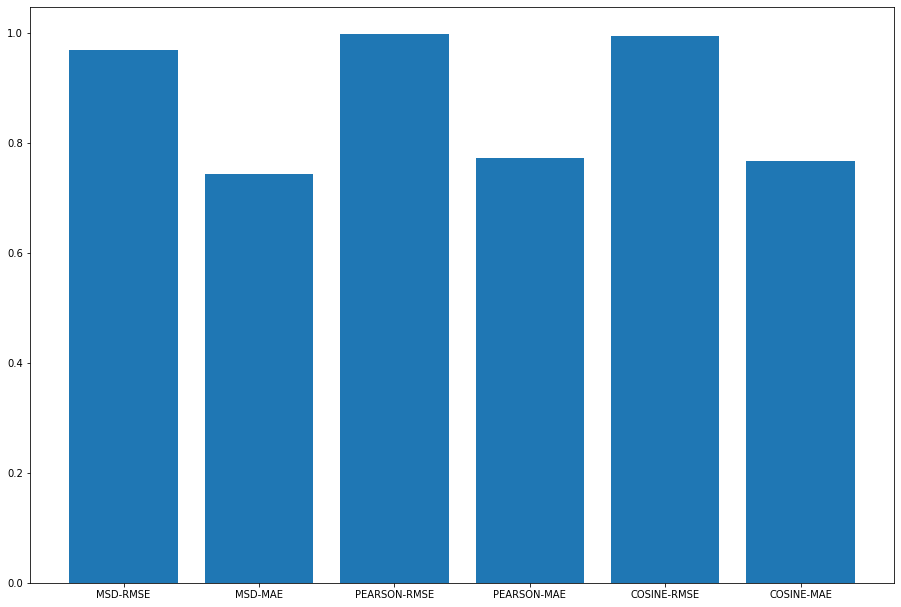

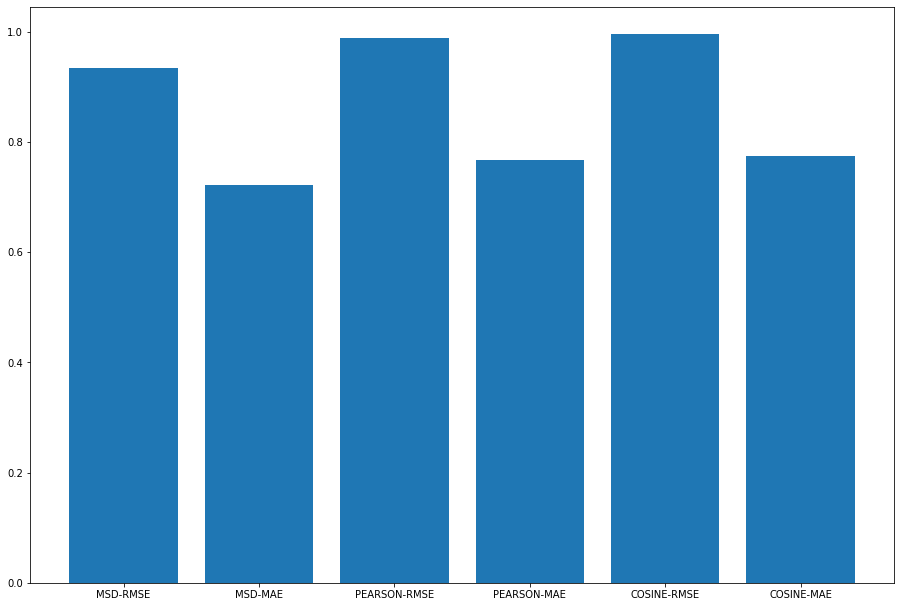

In [53]:
#E:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
y = [cross2['test_rmse'].mean(), cross2['test_mae'].mean(),cross4['test_rmse'].mean(), cross4['test_mae'].mean(),cross6['test_rmse'].mean(), cross6['test_mae'].mean()]
X = ['MSD-RMSE','MSD-MAE', 'PEARSON-RMSE', 'PEARSON-MAE', 'COSINE-RMSE', 'COSINE-MAE']
ax.bar(X,y)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
y = [cross3['test_rmse'].mean(), cross3['test_mae'].mean(),cross5['test_rmse'].mean(), cross5['test_mae'].mean(),cross7['test_rmse'].mean(), cross7
     ['test_mae'].mean()]
X = ['MSD-RMSE','MSD-MAE', 'PEARSON-RMSE', 'PEARSON-MAE', 'COSINE-RMSE', 'COSINE-MAE']
ax.bar(X,y)
plt.show()

In [42]:
cross8 = [0] * 100
cross9 = [0] * 100
i = 1
while i in range(101):
    print(i)
    sim_options = {
        "user_based": True,  # Compute  similarities between items
    }
    algo = KNNBasic(k = i, sim_options = sim_options)
    cross10 = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
    cross8[i-1] = cross10['test_rmse'].mean()
    sim_options = {
        "user_based": False,  # Compute  similarities between items
    }
    algo = KNNBasic(k = i, sim_options = sim_options)
    cross11 = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
    i = i+1
print(cross8, cross9)

1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2115  1.2054  1.2089  1.2049  1.2208  1.2103  0.0058  
Fit time          0.19    0.22    0.22    0.21    0.21    0.21    0.01    
Test time         0.73    0.69    0.67    0.74    0.85    0.74    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing simila

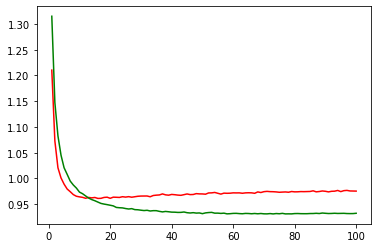

In [52]:
y = [0] * 100
for j in range(100):
    y[j] = j+1

plt.plot(y, cross8, color = 'red')
plt.plot(y, cross9, color = 'green')
plt.show()

In [62]:
lowest1 = 2
lowest2 = 2
low1 = 0
low2 = 0
print(cross9[1])
for i in range(100):
    if cross8[i] < lowest1:
        lowest1 = cross8[i] 
        low1 = i
    if cross9[i] < lowest2:
        lowest2 = cross9[i]
        low2 = i
print(low1,low2)

1.1474306613622143
15 72
